In [77]:
from pandas_datareader import data as pdr
import pandas as pd
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
def GetStock(stockname, start, end) :
    return (pdr.get_data_yahoo(stockname, start, end))

symbols = ['BBL.BK','KBANK.BK','SCB.BK','TMB.BK']

In [15]:
Dataf1=GetStock(symbols[0],'2016-01-01',pd.to_datetime('now'))
Dataf2=GetStock(symbols[1],'2016-01-01',pd.to_datetime('now'))
Dataf3=GetStock(symbols[2],'2016-01-01',pd.to_datetime('now'))
Dataf4=GetStock(symbols[3],'2016-01-01',pd.to_datetime('now'))

[*********************100%***********************]  1 of 1 downloaded

In [16]:
allstock=pd.concat([Dataf1['Close'], Dataf2['Close'],Dataf3['Close'],Dataf4['Close']],axis=1,
                  keys=[symbols[0],symbols[1],symbols[2],symbols[3]])

In [87]:
alldailyreturn = pd.concat([allstock[symbols[0]].pct_change(1),allstock[symbols[1]].pct_change(1)
                    ,allstock[symbols[2]].pct_change(1),allstock[symbols[3]].pct_change(1)]
                   ,axis=1,keys=[symbols[0],symbols[1],symbols[2],symbols[3]])
allmonthlyreturn = pd.concat([allstock[symbols[0]].pct_change(21),allstock[symbols[1]].pct_change(21)
                    ,allstock[symbols[2]].pct_change(21),allstock[symbols[3]].pct_change(21)]
                   ,axis=1,keys=[symbols[0],symbols[1],symbols[2],symbols[3]])
allannualreturn = pd.concat([allstock[symbols[0]].pct_change(252),allstock[symbols[1]].pct_change(252)
                    ,allstock[symbols[2]].pct_change(252),allstock[symbols[3]].pct_change(252)]
                   ,axis=1,keys=[symbols[0],symbols[1],symbols[2],symbols[3]])

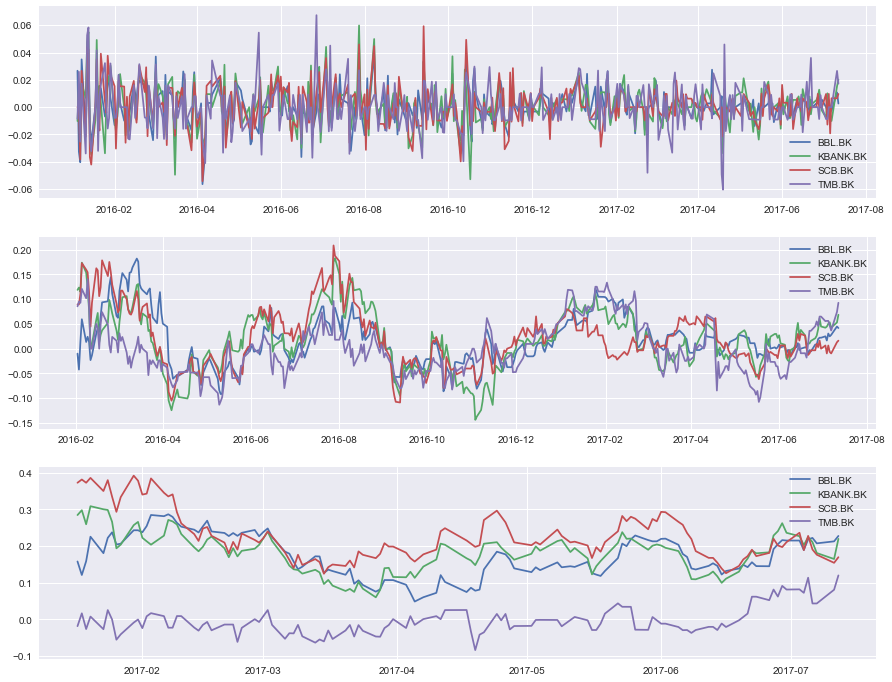

In [238]:
plt.figure(figsize=(15,12))
plt.subplot (311);
plt.plot(alldailyreturn);
plt.legend(allstock[symbols]);
plt.subplot (312);
plt.plot(allmonthlyreturn);
plt.legend(allstock[symbols]);
plt.subplot (313);
plt.plot(allannualreturn);
plt.legend(allstock[symbols]);

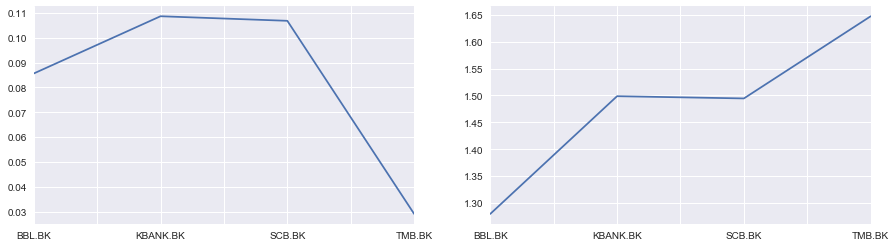

In [252]:
meanalldailyreturn = alldailyreturn.mean()*100
stdalldailyreturn = alldailyreturn.std()*100
plt.figure(figsize=(15,4));
plt.subplot(1,2,1);
meanalldailyreturn.plot();
plt.subplot(1,2,2);
stdalldailyreturn.plot();

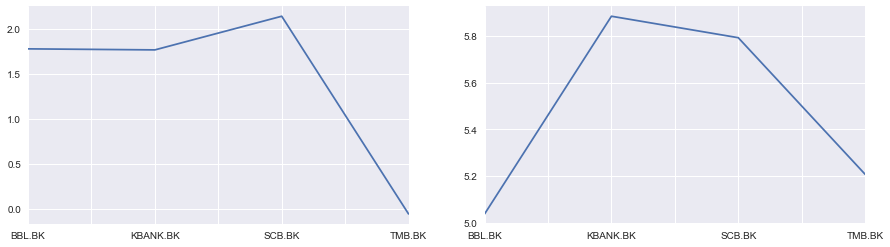

In [253]:
meanallmonthlyreturn = allmonthlyreturn.mean()*100
stdallmonthlyreturn = allmonthlyreturn.std()*100

plt.figure(figsize=(15,4));
plt.subplot(1,2,1);
meanallmonthlyreturn.plot();
plt.subplot(1,2,2);
stdallmonthlyreturn.plot();

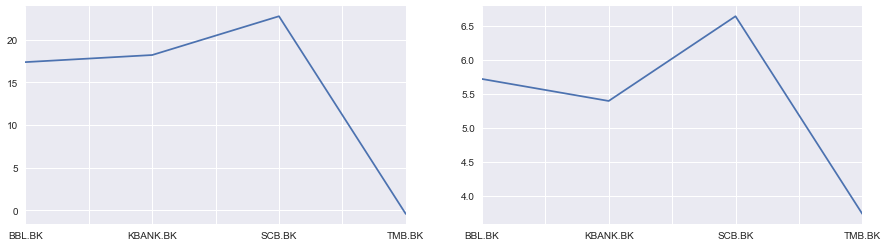

In [254]:
meanallannualreturn = allannualreturn.mean()*100
stdallannualreturn = allannualreturn.std()*100

plt.figure(figsize=(15,4));
plt.subplot(1,2,1);
meanallannualreturn.plot();
plt.subplot(1,2,2);
stdallannualreturn.plot();

In [31]:
allstock.describe()

,BBL.BK,KBANK.BK,SCB.BK,TMB.BK
count,372.000000,372.000000,372.000000,372.000000
mean,162.833192,176.452811,141.765666,2.225745
std,12.747474,14.018785,13.072469,0.136994
min,134.146744,138.083344,105.899376,1.893065
25%,153.637604,165.891800,131.945129,2.140000
50%,160.953690,177.745583,145.275009,2.224839
75%,175.585831,189.000000,152.587509,2.341936
max,187.500000,203.000000,160.875000,2.512782


/Applications/Pineapple.app/Contents/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


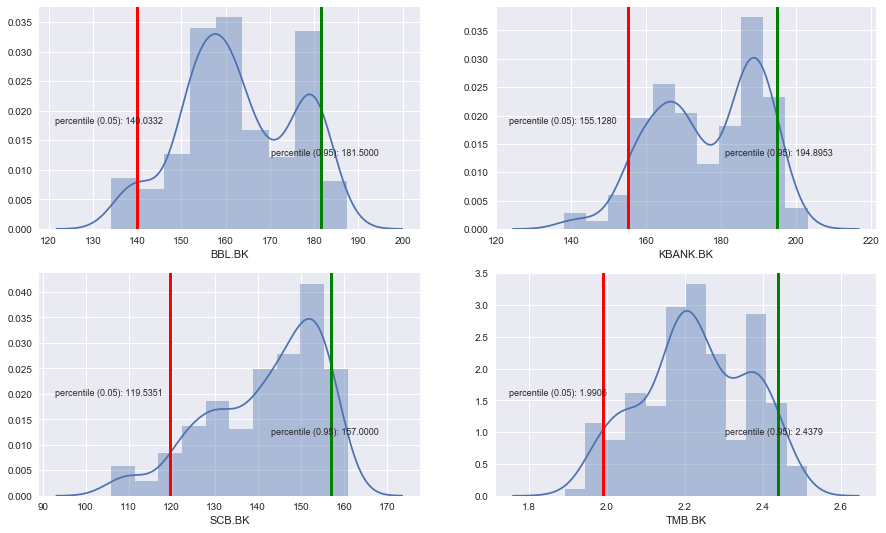

In [76]:
plt.figure(figsize=(15,9))
plt.subplot (221);
sns.distplot(allstock[symbols[0]]);
p=np.percentile(allstock[symbols[0]],5)
q=np.percentile(allstock[symbols[0]],95)
plt.axvline(x=p, linewidth=3,color='r');
plt.axvline(x=q, linewidth=3,color='g');
plt.figtext(0.14,0.7,"percentile (0.05): %.4f" % p,fontsize=9);
plt.figtext(0.34,0.65,"percentile (0.95): %.4f" % q,fontsize=9);

plt.subplot(222);
sns.distplot(allstock[symbols[1]]);
p=np.percentile(allstock[symbols[1]],5)
q=np.percentile(allstock[symbols[1]],95)
plt.axvline(x=p, linewidth=3,color='r');
plt.axvline(x=q, linewidth=3,color='g');
plt.figtext(0.56,0.7,"percentile (0.05): %.4f" % p,fontsize=9);
plt.figtext(0.76,0.65,"percentile (0.95): %.4f" % q,fontsize=9);

plt.subplot(223);
sns.distplot(allstock[symbols[2]]);
p=np.percentile(allstock[symbols[2]],5)
q=np.percentile(allstock[symbols[2]],95)
plt.axvline(x=p, linewidth=3,color='r');
plt.axvline(x=q, linewidth=3,color='g');
plt.figtext(0.14,0.28,"percentile (0.05): %.4f" % p,fontsize=9);
plt.figtext(0.34,0.22,"percentile (0.95): %.4f" % q,fontsize=9);

plt.subplot(224);
sns.distplot(allstock[symbols[3]]);
p=np.percentile(allstock[symbols[3]],5)
q=np.percentile(allstock[symbols[3]],95)
plt.axvline(x=p, linewidth=3,color='r');
plt.axvline(x=q, linewidth=3,color='g');
plt.figtext(0.56,0.28,"percentile (0.05): %.4f" % p,fontsize=9);
plt.figtext(0.76,0.22,"percentile (0.95): %.4f" % q,fontsize=9);